In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df=pd.read_csv('/Users/cristinaacevedo/Desktop/players.csv') #for pc
#df=pd.read_csv('players.csv') #online

In [3]:
#Check data
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
#Drop columns
df.drop(['Unnamed: 0','ID','Flag','Club Logo','Real Face'],axis=1,inplace=True)


In [6]:
footValues=df['Preferred Foot'].unique()
df['Preferred Foot'].replace(to_replace=[footValues[0],footValues[1]],value=[1,0],inplace=True)


In [7]:
df['Position']='Plays' + df['Position'].astype(str)
positions=df['Position'].unique()
positionDummies=pd.get_dummies(df['Position'])
df.drop(['Position'],axis=1,inplace=True)
df=pd.concat([df, positionDummies], axis=1)
df.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special',
       ...
       'PlaysRCB', 'PlaysRCM', 'PlaysRDM', 'PlaysRF', 'PlaysRM', 'PlaysRS',
       'PlaysRW', 'PlaysRWB', 'PlaysST', 'Playsnan'],
      dtype='object', length=111)

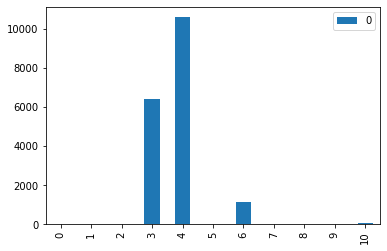

In [7]:
df['Body Type'].unique()
bodyTypesCounts=Counter(df['Body Type'])
bodyTypesCounts = pd.DataFrame.from_dict(bodyTypesCounts, orient='index').reset_index()
bodyTypesCounts.plot(kind='bar') #FIX X AXIS LABELS

In [8]:
realBodyTypes=bodyTypesCounts[bodyTypesCounts[0]>1].reset_index()

df['Body Type']=df['Body Type'].replace(to_replace=[realBodyTypes['index'].iloc[0], realBodyTypes['index'].iloc[1], realBodyTypes['index'].iloc[2]],value=[0,1,2])
df['Body Type']=df['Body Type'].apply(pd.to_numeric, errors='coerce')

In [9]:
df['Work Rate'].unique()
df[['Rate Up','Rate Down']] = df['Work Rate'].str.split("/",expand=True,)


In [10]:
df['Rate Up']=df['Rate Up'].replace(['Low','Medium','High'],[0,1,2])
df['Rate Down']=df['Rate Down'].replace([' Low',' Medium',' High'],[0,1,2])
df.drop(['Work Rate'],axis=1,inplace=True)


In [11]:
df['Loaned']=df['Loaned From'].notnull()
df.drop(['Loaned From'],axis=1,inplace=True)
df['Loaned']=np.multiply(df['Loaned'], 1)
df.drop(['Photo'],axis=1,inplace=True)


In [12]:
df.describe()
df.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
                   ...   
GKReflexes        float64
Release Clause     object
Rate Up           float64
Rate Down         float64
Loaned              int64
Length: 84, dtype: object

In [13]:
nationalityDummies=pd.get_dummies(df['Nationality'])
df.drop(['Nationality'],axis=1,inplace=True)
df=pd.concat([df, nationalityDummies], axis=1)

In [14]:
clubDummies=pd.get_dummies(df['Club'])
df.drop(['Club'],axis=1,inplace=True)
df=pd.concat([df, clubDummies], axis=1)

In [15]:
df['Value']=df['Value'].str[1:-1]
df['Value']=pd.to_numeric(df['Value'])

df['Wage']=df['Wage'].str[1:-1]
df['Wage']=pd.to_numeric(df['Wage'])


In [16]:
df['Weight']=df['Weight'].str.rstrip('lbs').astype(float)

In [17]:
df[['Height feet','Height inch']] = df['Height'].str.split("'",expand=True,)
df['Height feet']=pd.to_numeric(df['Height feet'])
df['Height inch']=pd.to_numeric(df['Height inch'])
df.drop(['Height'],axis=1,inplace=True)


In [18]:
df['Release Clause']=df['Release Clause'].str[1:-1]
df['Release Clause']=pd.to_numeric(df['Release Clause'])

In [19]:
colsNames=df.iloc[:,16:42].columns

for i in colsNames:
    newNames=[i, ('+'+i)]
    df[newNames]=df[i].str.split("+",expand=True,)
    df[newNames[0]]=pd.to_numeric(df[newNames[0]])
    df[newNames[1]]=pd.to_numeric(df[newNames[1]])

AttributeError: Can only use .str accessor with string values!

In [21]:
df.describe()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Jersey Number,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,...,Waasland-Beveren,Watford,Wellington Phoenix,West Bromwich Albion,West Ham United,Western Sydney Wanderers,Wigan Athletic,Willem II,Wolverhampton Wanderers,Yeni Malatyaspor,Yokohama F. Marinos,Çaykur Rizespor,Height feet,Height inch,+LS,+ST,+RS,+LW,+LF,+CF,+RF,+RW,+LAM,+CAM,+RAM,+LM,+LCM,+CM,+RCM,+RM,+LWB,+LDM,+CDM,+RDM,+RWB,+LB,+LCB,+CB,+RCB,+RB
count,4169.000000,4169.000000,4169.000000,4109.000000,4110.000000,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000,4162.000000,4168.000000,4168.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,4168.000000,...,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.00000,4169.000000,4169.00000,4169.000000,4169.000000,4169.000000,4169.000000,4168.000000,4168.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000
mean,27.251379,75.376589,77.646198,23.155658,30.640633,1810.418666,0.245921,1.449856,3.133877,2.786708,0.750120,15.844050,168.684501,65.966763,65.966763,65.966763,67.196518,67.269322,67.269322,67.269322,67.196518,67.662622,67.662622,67.662622,67.890266,67.213136,67.213136,67.213136,67.890266,64.771828,64.764706,64.764706,64.764706,64.771828,63.683461,62.350303,62.350303,62.350303,63.683461,58.802303,...,0.000240,0.005277,0.000240,0.003358,0.005517,0.00048,0.000720,0.00048,0.004078,0.001199,0.000240,0.001679,5.515835,5.291747,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521,2.086521
std,4.017433,3.613685,4.538256,104.159034,38.979662,243.498931,0.430684,0.696510,0.709782,0.874043,0.580076,13.982562,15.769687,7.847723,7.847723,7.847723,9.018811,8.721097,8.721097,8.721097,9.018811,8.488072,8.488072,8.488072,8.090881,6.595869,6.595869,6.595869,8.090881,8.019791,9.151612,9.151612,9.151612,8.019791,9.056844,12.027747,12.027747,12.027747,9.056844,19.097008,...,0.015488,0.072460,0.015488,0.057859,0.074080,0.02190,0.026819,0.02190,0.063734,0.034615,0.015488,0.040947,0.499809,4.100467,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897,0.284897
min,17.000000,71.000000,71.000000,1.000000,1.000000,918.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,121.000000,37.000000,37.000000,37.000000,34.000000,35.000000,35.000000,35.000000,34.000000,37.000000,37.000000,37.000000,37.000000,41.000000,41.000000,41.000000,37.000000,40.000000,40.000000,40.000000,40.000000,40.000000,38.000000,31.000000,31.000000,31.000000,38.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,24.000000,73.000000,74.000000,3.700000,11.000000,1740.000000,0.000000,1.000000,3.000000,2.000000,0.000000,7.000000,159.000000,62.000000,62.000000,62.000000,64.000000,63.000000,63.00

In [22]:
dfBackup=df

Names=df['Name']
df.drop(['Name'],axis=1,inplace=True)

df.drop(['Joined'],axis=1,inplace=True)
df.drop(['Contract Valid Until'],axis=1,inplace=True)

from sklearn import preprocessing

x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.columns = dfBackup.columns

df.describe()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Jersey Number,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,...,Waasland-Beveren,Watford,Wellington Phoenix,West Bromwich Albion,West Ham United,Western Sydney Wanderers,Wigan Athletic,Willem II,Wolverhampton Wanderers,Yeni Malatyaspor,Yokohama F. Marinos,Çaykur Rizespor,Height feet,Height inch,+LS,+ST,+RS,+LW,+LF,+CF,+RF,+RW,+LAM,+CAM,+RAM,+LM,+LCM,+CM,+RCM,+RM,+LWB,+LDM,+CDM,+RDM,+RWB,+LB,+LCB,+CB,+RCB,+RB
count,4169.000000,4169.000000,4169.000000,4109.000000,4110.000000,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000,4162.000000,4168.000000,4168.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,4168.000000,...,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.00000,4169.000000,4169.00000,4169.000000,4169.000000,4169.000000,4169.000000,4168.000000,4168.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000
mean,0.427141,0.190286,0.276925,0.022747,0.052554,0.624943,0.245921,0.112464,0.533469,0.446677,0.375060,0.151470,0.449854,0.536422,0.536422,0.536422,0.572354,0.556368,0.556368,0.556368,0.572354,0.547547,0.547547,0.547547,0.572042,0.557726,0.557726,0.557726,0.572042,0.550485,0.526909,0.526909,0.526909,0.550485,0.558336,0.559827,0.559827,0.559827,0.558336,0.602352,...,0.000240,0.005277,0.000240,0.003358,0.005517,0.00048,0.000720,0.00048,0.004078,0.001199,0.000240,0.001679,0.515835,0.481068,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840,0.028840
std,0.167393,0.157117,0.189094,0.106939,0.069113,0.170517,0.430684,0.174127,0.177446,0.218511,0.290038,0.142679,0.148771,0.145328,0.145328,0.145328,0.155497,0.150364,0.150364,0.150364,0.155497,0.151573,0.151573,0.151573,0.149831,0.140338,0.140338,0.140338,0.149831,0.178218,0.194715,0.194715,0.194715,0.178218,0.196888,0.214781,0.214781,0.214781,0.196888,0.222058,...,0.015488,0.072460,0.015488,0.057859,0.074080,0.02190,0.026819,0.02190,0.063734,0.034615,0.015488,0.040947,0.499809,0.372770,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966,0.094966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.291667,0.086957,0.125000,0.002772,0.017730,0.575630,0.000000,0.000000,0.500000,0.250000,0.000000,0.061224,0.358491,0.462963,0.462963,0.462963,0.517241,0.482759,0.482759,0.482759,0.517241,0.482143,0.482143,0.482143,0.518519,0.468085,0.468085,0.468085,0.518519,0.

In [23]:
#dfBackup.to_csv('processedPlayers.csv', index=False)

In [24]:
df.fillna(df.mean(), inplace=True)


In [25]:
from sklearn.metrics import pairwise_distances

similarity_matrix=pairwise_distances(df)


In [26]:
similarity_matrix.shape

(4169, 4169)

In [27]:
mapping = pd.Series(df.index,index = Names)
mapping

Name
L. Messi                0
Cristiano Ronaldo       1
Neymar Jr               2
De Gea                  3
K. De Bruyne            4
                     ... 
J. Harper            4164
R. De Laet           4165
J. Zimmer            4166
C. Săpunaru          4167
Afonso Figueiredo    4168
Length: 4169, dtype: int64

In [28]:
def recommend_players(player_input):

    player_index = mapping[player_input]
    #get similarity values with other movies
    #similarity_score is the list of index and similarity matrix

    similarity_score = list(enumerate(similarity_matrix[player_index]))
    #sort in descending order the similarity score of movie inputted with all the other movies

    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar movies. Ignore the first movie.

    similarity_score = similarity_score[1:15]
    #return movie names using the mapping series

    player_indices = [i[0] for i in similarity_score]
    return (Names.iloc[player_indices])


    

In [29]:
recommend_players('L. Messi')

3125          R. Bennett
3996         M. Lešković
2942    Y. Gómez Andrade
3276       F. Ceccherini
3913       L. Ceppitelli
4150        A. Henríquez
1073          G. Paletta
2628            B. Cesar
3694       Y. Abdelhamid
3498             Claiton
3244           A. Cordaz
3128         D. Dainelli
7              L. Suárez
1426       L. Unnerstall
Name: Name, dtype: object